In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from sklearn.utils import shuffle


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

TensorFlow 2.x selected.


Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#  Загрузка исходного датасета

In [0]:
LABELS_FILENAME = "/content/drive/My Drive/Colab Notebooks/road/test.csv"
TRAINING_FILENAME = "/content/drive/My Drive/Colab Notebooks/road/training.csv"

In [0]:
def load_train_data(filename):
    data = pd.read_csv(filename).dropna()

    images = list(map(lambda x: x.split(), data['Image']))
    X_train = np.array(images, dtype='float')

    keypoints = data[data.columns[:-1]].values
    Y_train = np.array(keypoints, dtype='float')

    X_train, Y_train = shuffle(X_train, Y_train)
    return X_train, Y_train

In [0]:
def load_test_data(filename):
    data = pd.read_csv(filename)

    images = list(map(lambda x: x.split(), data['Image']))
    X_train = np.array(images, dtype='float')

    return X_train

In [0]:
X_train, Y_train = load_train_data(TRAINING_FILENAME)
X_test = load_test_data(TEST_FILENAME)

# Пример изображения 

In [0]:
def plot_image(image, keypoints):
    image = image.copy().reshape(96, 96)

    for i in range(0, len(keypoints) - 1, 2):
        image[int(keypoints[i+1]), int(keypoints[i])] = 255

    plt.imshow(image, cmap='gray')
    plt.show()

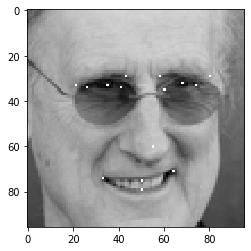

In [0]:
plot_image(X_train[0], Y_train[0])

# Нейронная сеть

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(96,96, 1)),
    keras.layers.Dense(128, activation="relu"),
    # keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(30)
])

model.compile(optimizer='adam', 
              loss='mse',
              metrics=['mae', 'accuracy'])

In [0]:
X_train = X_train.reshape(-1, 96, 96, 1)
print(X_train.shape)
print(Y_train.shape)

(2140, 96, 96, 1)
(2140, 30)


In [0]:
epochs_num = 200
history = model.fit(X_train, Y_train, epochs=epochs_num, validation_split=0.2)

Train on 1712 samples, validate on 428 samples
Epoch 1/200
1712/1712 [==============================] - 1s 618us/sample - loss: 17580.1895 - mae: 74.0825 - accuracy: 0.0777 - val_loss: 958.3510 - val_mae: 24.2582 - val_accuracy: 0.5678
Epoch 2/200
1712/1712 [==============================] - 1s 381us/sample - loss: 669.7260 - mae: 20.4050 - accuracy: 0.4416 - val_loss: 430.9793 - val_mae: 16.2851 - val_accuracy: 0.5374
Epoch 3/200
1712/1712 [==============================] - 1s 395us/sample - loss: 316.0260 - mae: 14.0656 - accuracy: 0.5532 - val_loss: 230.4235 - val_mae: 11.9161 - val_accuracy: 0.5935
Epoch 4/200
1712/1712 [==============================] - 1s 398us/sample - loss: 200.0921 - mae: 11.0882 - accuracy: 0.5491 - val_loss: 180.0234 - val_mae: 10.5701 - val_accuracy: 0.4953
Epoch 5/200
1712/1712 [==============================] - 1s 387us/sample - loss: 163.6727 - mae: 9.9845 - accuracy: 0.4679 - val_loss: 176.6806 - val_mae: 10.4273 - val_accuracy: 0.3388
Epoch 6/200
1712/

# Результат

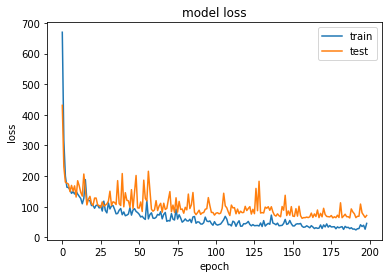

In [0]:
plt.plot(history.history['loss'][1:], label='train')
plt.plot(history.history['val_loss'][1:], label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

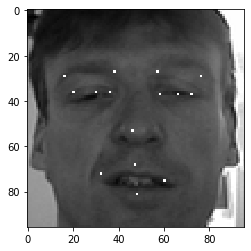

In [0]:
X_test = X_test.reshape(-1, 96, 96, 1)
Y_test = model.predict(X_test)

plot_image(X_test[4].reshape(96, 96), Y_test[4])